In [1]:
from pandas.core.frame import DataFrame
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from scipy.stats import skew
plt.style.use('ggplot')

## 读入数据

In [2]:
def Read_Data():
    data = pd.read_csv('D:\大四材料\实习\梅钢\lz_eige_data\lz_eige_data.csv' , nrows = 10000000, header = None) # 获取日期数据
    return data
## 数据共 27736166 行

In [3]:
def Rename_Columns(data):
    ## 重命名索引
     data.columns=['id','dev_no','dev_name','point_no','unit_no','ts','temperature','acceleration_peak_x','acceleration_peak_y','acceleration_peak_z','acceleration_rms_x','acceleration_rms_y','acceleration_rms_z','speed_peak_x','speed_peak_y','speed_peak_z','speed_rms_x','speed_rms_y','speed_rms_z','envelop_energy']


In [4]:
data = Read_Data()
Rename_Columns(data)

In [5]:
def Data_Accuracy(data):
    ### 无效数据
    invalid_ratio = np.mean(data.isna())
    print("无效数据率:\n",invalid_ratio)
    O_invalid_ratio = mean(invalid_ratio)
    print("整体数据无效率: ",O_invalid_ratio)
    ### 重复数据
    duplicate_ratio = np.sum(data.duplicated())
    print("重复数据量:\n",duplicate_ratio)


In [6]:
print("读入完成。。。")
data.sample(10)

读入完成。。。


,id,dev_no,dev_name,point_no,unit_no,ts,temperature,acceleration_peak_x,acceleration_peak_y,acceleration_peak_z,acceleration_rms_x,acceleration_rms_y,acceleration_rms_z,speed_peak_x,speed_peak_y,speed_peak_z,speed_rms_x,speed_rms_y,speed_rms_z,envelop_energy
1253381,8927697,452213E01,2#张力辊1#辊电机,194fe2feff8d79e0-Z,C208,1.675448e+12,NaN,7.210000,7.49,7.51,2.010000,1.66,1.96,2.370000,1.82,1.5692,0.795400,0.6606,0.6217,9.95
7219342,14893658,450208E01,1#机架主传动电机,50294D205137014,C102,1.676038e+12,NaN,13.758199,NaN,NaN,1.032590,NaN,NaN,6.657839,NaN,NaN,2.047595,NaN,NaN,NaN
7308471,14982787,450135E01,碎边剪WS主电机,47c376feff958edc-Z,C102,1.676044e+12,NaN,21.939999,21.41,16.51,8.160000,6.86,4.98,3.010000,3.31,2.6200,1.000900,1.1670,0.9077,11.34
6738724,14413040,451202M01,1#开卷机减速箱,50294D205120024,C117,1.676005e+12,NaN,0.125144,NaN,NaN,0.024279,NaN,NaN,0.293115,NaN,NaN,0.077135,NaN,NaN,NaN
9357683,17031999,450210M13,3机架大齿轮箱,50294D205171042,C102,1.676187e+12,NaN,42.819819,NaN,NaN,3.574231,NaN,NaN,17.515702,NaN,NaN,5.298502,NaN,NaN,NaN
933518,8607834,450201E01,6＃张力辊1#电机,8bb1cffeff8d79e0-S,C102,1.675350e+12,13.437500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569006,12243322,450210M13,3机架大齿轮箱,50294D205171044,C102,1.675852e+12,NaN,41.411829,NaN,NaN,2.268453,NaN,NaN,20.823409,NaN,NaN,5.049565,NaN,NaN,NaN
1806555,9480871,451102M03,2号开卷机齿轮箱,50294D205130034,C112,1.675619e+12,NaN,0.977927,NaN,NaN,0.153057,NaN,NaN,0.612876,NaN,NaN,0.043476,NaN,NaN,NaN
3573886,11248202,451244M03,1#卷取机减速箱,50294D205134041,C117,1.675782e+12,12.993407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6056368,13730684,450208M13,1机架大齿轮箱,50294D205137021,C102,1.675957e+12,NaN,0.859120,NaN,NaN,0.137621,NaN,NaN,0.192488,NaN,NaN,0.043476,NaN,NaN,NaN


## 时间戳转换

In [7]:
# 去除所有ts是NAN的行
print(data.shape[0])
data.dropna(axis=0,subset=['ts'],inplace=True)
print(data.shape[0])

10000000
9999196


In [8]:
## 时间戳转为时间序列
print( data['ts'].dtype)
data['ts'] = data['ts'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000).strftime('%Y-%m-%d %H:%M:%S'))
print(data['ts'].dtype)
# data['ts'] = pd.to_datetime(data['ts'])


float64
object


In [9]:
data['ts'] = pd.to_datetime(data['ts'])
data['ts'].sample(10)

4962592   2023-02-09 02:10:57
1493917   2023-02-04 22:53:01
8949344   2023-02-12 07:32:01
3150557   2023-02-07 14:50:35
7899786   2023-02-11 11:15:19
2003876   2023-02-06 16:28:47
3418079   2023-02-07 20:03:56
3650614   2023-02-08 00:35:39
655025    2023-02-01 19:45:22
4153443   2023-02-08 10:24:37
Name: ts, dtype: datetime64[ns]

In [10]:
## 缺失值检查
## 一定没有ts缺失，因为缺失已经被删了
Data_Accuracy(data)

D:\Anaconda\anaconda\envs\data\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


无效数据率:
 id                     0.000000
dev_no                 0.000000
dev_name               0.000000
point_no               0.000000
unit_no                0.000000
ts                     0.000000
temperature            0.663111
acceleration_peak_x    0.336889
acceleration_peak_y    0.869157
acceleration_peak_z    0.869157
acceleration_rms_x     0.336889
acceleration_rms_y     0.869157
acceleration_rms_z     0.869157
speed_peak_x           0.336889
speed_peak_y           0.869157
speed_peak_z           0.869157
speed_rms_x            0.336889
speed_rms_y            0.869157
speed_rms_z            0.869157
envelop_energy         0.869157
dtype: float64
整体数据无效率:  0.491653988980714
重复数据量:
 0


In [11]:
data.tail(10)

,id,dev_no,dev_name,point_no,unit_no,ts,temperature,acceleration_peak_x,acceleration_peak_y,acceleration_peak_z,acceleration_rms_x,acceleration_rms_y,acceleration_rms_z,speed_peak_x,speed_peak_y,speed_peak_z,speed_rms_x,speed_rms_y,speed_rms_z,envelop_energy
9999990,17674306,450209M13,2机架大齿轮箱,50294D205171014,C102,2023-02-13 03:51:04,NaN,6.437369,NaN,NaN,0.483647,NaN,NaN,4.354996,NaN,NaN,1.348467,NaN,NaN,NaN
9999991,17674307,450209M13,2机架大齿轮箱,50294D205171021,C102,2023-02-13 03:51:04,NaN,6.459533,NaN,NaN,0.521980,NaN,NaN,3.797517,NaN,NaN,1.055353,NaN,NaN,NaN
9999992,17674308,450209M13,2机架大齿轮箱,50294D205171022,C102,2023-02-13 03:51:04,NaN,3.585156,NaN,NaN,0.292849,NaN,NaN,3.156592,NaN,NaN,0.904588,NaN,NaN,NaN
9999993,17674309,450209M13,2机架大齿轮箱,50294D205171024,C102,2023-02-13 03:51:04,NaN,3.243976,NaN,NaN,0.277018,NaN,NaN,2.760747,NaN,NaN,0.995047,NaN,NaN,NaN
9999994,17674310,450210E01,3#机架主传动电机,50294D205171031,C102,2023-02-13 03:51:04,NaN,6.245926,NaN,NaN,0.485028,NaN,NaN,4.093787,NaN,NaN,1.619844,NaN,NaN,NaN
9999995,17674311,450210E01,3#机架主传动电机,50294D205171032,C102,2023-02-13 03:51:04,NaN,8.174423,NaN,NaN,0.606266,NaN,NaN,5.548491,NaN,NaN,2.218695,NaN,NaN,NaN
9999996,17674312,450210E01,3#机架主传动电机,50294D205171033,C102,2023-02-13 03:51:04,NaN,7.044190,NaN,NaN,0.593633,NaN,NaN,2.732698,NaN,NaN,0.857606,NaN,NaN,NaN
9999997,17674313,450210E01,3#机架主传动电机,50294D205171034,C102,2023-02-13 03:51:04,NaN,8.844166,NaN,NaN,0.615582,NaN,NaN,3.589953,NaN,NaN,1.093219,NaN,NaN,NaN
9999998,17674314,450209M13,2机架大齿轮箱,50294D205171011,C102,2023-02-13 03:51:04,NaN,9.195675,NaN,NaN,0.700421,NaN,NaN,6.898361,NaN,NaN,2.700441,NaN,NaN,NaN
9999999,17674315,450209M13,2机架大齿轮箱,50294D205171012,C102,2023-02-13 03:51:04,NaN,6.883454,NaN,NaN,0.521546,NaN,NaN,4.008237,NaN,NaN,1.597405,NaN,NaN,NaN


In [12]:
data

,id,dev_no,dev_name,point_no,unit_no,ts,temperature,acceleration_peak_x,acceleration_peak_y,acceleration_peak_z,acceleration_rms_x,acceleration_rms_y,acceleration_rms_z,speed_peak_x,speed_peak_y,speed_peak_z,speed_rms_x,speed_rms_y,speed_rms_z,envelop_energy
804,7675120,452235E01,SPM支撑辊1#电机,c9bbcffeff8d79e0-S,C208,2023-01-30 01:00:00,20.6875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
805,7675121,452235E01,SPM支撑辊1#电机,c9bbcffeff8d79e0-Z,C208,2023-01-30 01:00:00,NaN,273.000000,95.400002,48.049999,84.729996,24.969999,16.719999,7.840000,9.33,5.58,2.680000,3.4700,2.3100,20.15
806,7675122,450129E02,2#活套2#电机,fe1fe4feff8d79e0-S,C102,2023-01-30 01:00:02,6.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807,7675123,450129E02,2#活套2#电机,fe1fe4feff8d79e0-Z,C102,2023-01-30 01:00:02,NaN,9.820000,9.780000,3.140000,3.530000,3.780000,0.663600,3.330000,2.36,1.72,1.416300,0.8485,0.6606,9.78
808,7675124,451223E01,拉矫机主传动电机,5bf8d6feff8d79e0-S,C117,2023-01-30 01:00:03,9.8125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,17674311,450210E01,3#机架主传动电机,50294D205171032,C102,2023-02-13 03:51:04,NaN,8.174423,NaN,NaN,0.606266,NaN,NaN,5.548491,NaN,NaN,2.218695,NaN,NaN,NaN
9999996,17674312,450210E01,3#机架主传动电机,50294D205171033,C102,2023-02-13 03:51:04,NaN,7.044190,NaN,NaN,0.593633,NaN,NaN,2.732698,NaN,NaN,0.857606,NaN,NaN,NaN
9999997,17674313,450210E01,3#机架主传动电机,50294D205171034,C102,2023-02-13 03:51:04,NaN,8.844166,NaN,NaN,0.615582,NaN,NaN,3.589953,NaN,NaN,1.093219,NaN,NaN,NaN
9999998,17674314,450209M13,2机架大齿轮箱,50294D205171011,C102,2023-02-13 03:51:04,NaN,9.195675,NaN,NaN,0.700421,NaN,NaN,6.898361,NaN,NaN,2.700441,NaN,NaN,NaN


In [13]:
### 数据重复值检查
data[data.duplicated()]

,id,dev_no,dev_name,point_no,unit_no,ts,temperature,acceleration_peak_x,acceleration_peak_y,acceleration_peak_z,acceleration_rms_x,acceleration_rms_y,acceleration_rms_z,speed_peak_x,speed_peak_y,speed_peak_z,speed_rms_x,speed_rms_y,speed_rms_z,envelop_energy


In [14]:
data.duplicated().sum()

0

In [15]:
# T = data.temperature.notnull().index
# T = np.nonzero(data.temperature)
T = set(data[data['temperature'].notnull()==True].id)
X = set(data[data['acceleration_peak_x'].notnull()==True].id)
YZ = set(data[data['acceleration_peak_y'].notnull()==True].id)
# print(len(T),len(X),len(ZY))
print(len(T))

3368616


In [16]:
# set转list
Tl = list(T)
Xl = list(X)
YZl = list(YZ)
Tl.sort()
Xl.sort()
YZl.sort()


ONLY_X = list(X - YZ)
"""
ONLY_X : 有线振动数据 list 数组
"""
ONLY_X.sort()

print(len(T),len(X),len(YZ),len(ONLY_X))

3368616 6630580 1308324 5322256


## 绘集合图

<Axes: >

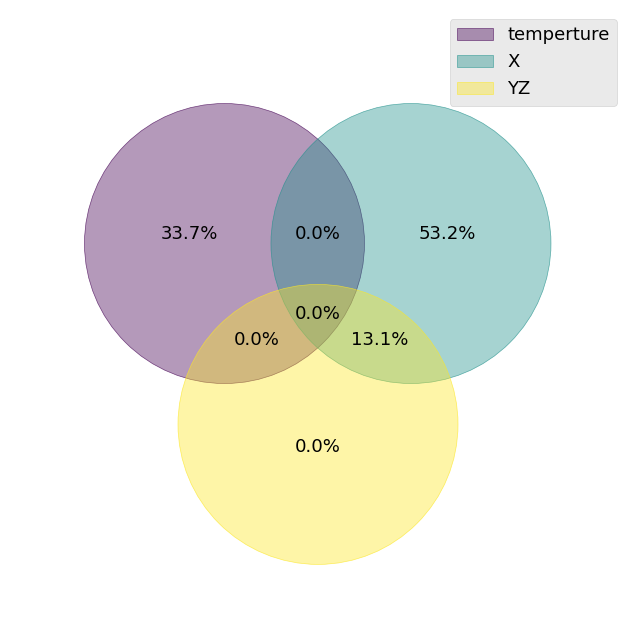

In [17]:
from venn import venn

musicians = {
    "temperture": T,
    "X": X,
    "YZ": YZ
}
venn(musicians, fmt="{percentage:.1f}%")

## 数据分组

In [18]:
# 按point_no分组
point_no_groups = data.groupby(['point_no'])
print("一共包含  ",len(point_no_groups),"  point_no_groups")

一共包含   988   point_no_groups


In [19]:
#  按 dev_no 分组
dev_no_groups = data.groupby(['dev_no'])
print("一共包含  ",len(dev_no_groups),"  dev_no_groups")

一共包含   153   dev_no_groups


In [20]:
#  按dev_no + point_no分组
dev_point_no_groups = data.groupby(['dev_no','point_no'])
print("一共包含  ",len(dev_point_no_groups),"  dev_point_no_groups")

##说明 point_no 可以唯一确定一条数据

一共包含   988   dev_point_no_groups


# 以temperature为例

In [21]:
## 提取temperature、X
Temp = data[{'point_no','ts','temperature'}]
Temp

C:\Users\JDD\AppData\Local\Temp\ipykernel_12872\954752259.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  Temp = data[{'point_no','ts','temperature'}]


,point_no,ts,temperature
804,c9bbcffeff8d79e0-S,2023-01-30 01:00:00,20.6875
805,c9bbcffeff8d79e0-Z,2023-01-30 01:00:00,NaN
806,fe1fe4feff8d79e0-S,2023-01-30 01:00:02,6.5000
807,fe1fe4feff8d79e0-Z,2023-01-30 01:00:02,NaN
808,5bf8d6feff8d79e0-S,2023-01-30 01:00:03,9.8125
...,...,...,...
9999995,50294D205171032,2023-02-13 03:51:04,NaN
9999996,50294D205171033,2023-02-13 03:51:04,NaN
9999997,50294D205171034,2023-02-13 03:51:04,NaN
9999998,50294D205171011,2023-02-13 03:51:04,NaN


In [22]:
Temp = Temp.dropna() ## 去除NAN值
Temp_point_no_groups = Temp.groupby(['point_no'])
print("一共包含  ",len(Temp_point_no_groups),"  Temp_point_no_groups")

一共包含   494   Temp_point_no_groups


## 分析数据平均值、方差

In [23]:
## 每组平均值
Temp_point_no_groups_m = Temp_point_no_groups.mean()
print(Temp_point_no_groups_m)

                    temperature
point_no                       
001de4feff8d79e0-S    11.550120
01c476feff958edc-S    14.458903
021de4feff8d79e0-S    14.957307
02b6cffeff8d79e0-S    18.350017
0338e4feff8d79e0-S    12.297060
...                         ...
ff19e4feff8d79e0-S    27.237340
ff48e2feff8d79e0-S    20.819036
ff5ae2feff8d79e0-S    24.999747
ffbdcffeff8d79e0-S    19.395167
ffc476feff958edc-S    24.568959

[494 rows x 1 columns]


C:\Users\JDD\AppData\Local\Temp\ipykernel_12872\1598978151.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Temp_point_no_groups_m = Temp_point_no_groups.mean()


In [24]:
## 每组方差
Temp_point_no_groups_v = Temp_point_no_groups.var()
Temp_point_no_groups_v

C:\Users\JDD\AppData\Local\Temp\ipykernel_12872\4160799696.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Temp_point_no_groups_v = Temp_point_no_groups.var()


,temperature
point_no,
001de4feff8d79e0-S,3.724554
01c476feff958edc-S,2.758735
021de4feff8d79e0-S,10.183343
02b6cffeff8d79e0-S,1.672623
0338e4feff8d79e0-S,6.588946
...,...
ff19e4feff8d79e0-S,14.337256
ff48e2feff8d79e0-S,0.520073
ff5ae2feff8d79e0-S,13.860226


In [25]:
group = Temp_point_no_groups.get_group("50294D205151051")
group = group.sort_values(by='ts')
group.point_no.values[0]

'50294D205151051'

In [26]:
# 数据传参，异常分析
# 重新设置索引，转为numpy格式
GroupTemperture = group.temperature.reset_index(drop = True)
GroupTS = group.ts.reset_index(drop = True)
type(GroupTemperture)

pandas.core.series.Series

In [27]:
GroupTemperture

0        32.531822
1        32.628334
2        33.188683
3        32.848919
4        32.862713
           ...    
17163    39.225616
17164    39.225616
17165    39.225616
17166    39.225616
17167    39.225616
Name: temperature, Length: 17168, dtype: float64

## 1、滑动窗口的3-sigma 【异常检测】

In [28]:
def sliding_3_sigma(win, t, a, ts):
    """
    滑动窗口的3-sigma
    :param win: windows，窗口大小
    :param t: 3-sigma ,t = 3
    :param a: 数值序列 pandas.core.series.Series
    :param ts: 时间序列 pandas.core.series.Series
    :return: x,y 异常点位置与数值
    """
    # 定义窗口大小和阈值
    window_size = win
    threshold = t

    # 检测异常值和突变
    anomalies = []
    for i in range(0,len(a) - window_size + 1):
        window = a[i:i+window_size]
        mean_w = np.mean(window)
        std_w = np.std(window)
        for j in range(window_size):
            if abs(window[j+i] - mean_w) > threshold * std_w:
                anomalies.append(i+j)
                # break

    # 显示异常点
    x = ts[anomalies]
    y = a[anomalies]

    # 可视化结果
    plt.rcParams['font.sans-serif'] = 'Simhei' # 显示中文
    plt.figure(figsize=(16,10),dpi=150)
    plt.scatter(x, y ,edgecolors='b')
    plt.plot(ts,a)
    # plt.xticks(ts.values[::1000]) # 坐标轴每隔1000取一个
    plt.gcf().autofmt_xdate() # 自适应X坐标
    plt.title("滑动窗口的3-sigma -- 异常检测")
    plt.xlabel('时间')
    plt.ylabel('数值')
    plt.show()

    return x,y


## 2、滑动窗口的箱线图 【异常检测】

In [29]:
def sliding_boxplot(win, t, a, ts):
    """
    滑动窗口的箱线图
    :param win: windows，窗口大小
    :param t: 阈值大小，阈值乘以IQR得到下边界(lower_bound)和上边界(upper_bound)
    :param a: 数值序列 pandas.core.series.Series
    :param ts: 时间序列 pandas.core.series.Series
    :return: x,y 异常点位置与数值
    """
    # 定义窗口大小和阈值
    window_size = win
    threshold = t

    # 检测异常值和突变
    anomalies = []
    for i in range(0, len(a) - window_size + 1):
        window = a[i:i + window_size]
        q1, q3 = np.percentile(window, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        for j in range(window_size):
            if window[j+i] < lower_bound or window[j+i] > upper_bound:
                anomalies.append(i + j)
                # break

    # 显示异常点
    x = ts[anomalies]
    y = a[anomalies]

    # 可视化结果
    plt.rcParams['font.sans-serif'] = 'Simhei'  # 显示中文
    plt.figure(figsize=(16, 10), dpi=150)
    plt.scatter(x, y, edgecolors='b')
    plt.plot(ts, a)
    plt.gcf().autofmt_xdate()  # 自适应X坐标
    plt.title("滑动窗口的箱线图  -- 异常检测")
    plt.xlabel('时间')
    plt.ylabel('数值')
    plt.show()

    return x,y

# 使用滑动窗口来检测异常值和突变。对于每个窗口，我们首先计算第一四分位数(q1)和第三四分位数(q3)，
# 然后计算IQR(q3 - q1)，最后将阈值乘以IQR得到下边界(lower_bound)和上边界(upper_bound)。
# 如果窗口中的任何一个值小于lower_bound或大于upper_bound，则认为该窗口存在异常点。
# 在这里，我们使用np.quantile函数计算四分位数，因为它比传统的np.percentile函数更快。

## 3、滑动窗口 3_sigma 【数据修复】

In [30]:
def sliding_3_sigma_window_outlier_detection(win, t, a, ts, fill_threshold=True):
    """
    滑动窗口 3_sigma 数据修复
    :param win: windows，窗口大小
    :param t: 阈值大小，阈值乘以IQR得到下边界(lower_bound)和上边界(upper_bound)
    :param a: 数值序列 pandas.core.series.Series
    :param ts: 时间序列 pandas.core.series.Series
    :param fill_threshold:
    :return:
    """
    # 定义窗口大小和阈值
    window_size = win
    threshold = t
    # 检测异常值和突变
    anomalies = []
    for i in range(0, len(a) - window_size + 1):
        window = a[i:i+window_size]
        mean_w = np.mean(window)
        std_w = np.std(window)
        for j in range(window_size):
            if abs(window[j+i] - mean_w) > threshold * std_w:
                anomalies.append(i+j)
                # if fill_threshold: # 会改变原始数据
                #     a[i+j] = mean_w + threshold * std_w if window[j+i] > mean_w else mean_w - threshold * std_w

    # 可视化结果
    fig, ax = plt.subplots(figsize=(16, 10), dpi=150)
    # ax.scatter(ts[anomalies], a[anomalies], edgecolors='b', label='异常点')
    ax.plot(ts, a, label='原始数据')

    # 填充阈值修复后的数据
    if fill_threshold:
        fixed_a = a.copy()
        for i in range(len(a) - window_size + 1):
            window = a[i:i+window_size]
            mean_w = np.mean(window)
            std_w = np.std(window)
            for j in range(window_size):
                if abs(window[j+i] - mean_w) > threshold * std_w:
                    fixed_a[i+j] = mean_w + threshold * std_w if window[j+i] > mean_w else mean_w - threshold * std_w
        ax.plot(ts, fixed_a, label='修复后数据')

    plt.title("滑动窗口 3_sigma+数据修复")
    ax.set_xlabel('时间')
    ax.set_ylabel('数值')
    ax.legend()
    fig.autofmt_xdate() # 自适应X坐标
    plt.show()

## 4、滑动窗口 箱线图 【数据修复】

In [31]:
def sliding_boxplot_window_outlier_detection(win, t, a, ts, fill_threshold=True):
    """
    滑动窗口 箱线图 数据修复
    :param win: windows，窗口大小
    :param t: 阈值大小，阈值乘以IQR得到下边界(lower_bound)和上边界(upper_bound)
    :param a: 数值序列 pandas.core.series.Series
    :param ts: 时间序列 pandas.core.series.Series
    :param fill_threshold:
    :return:
    """
    # 定义窗口大小和阈值
    window_size = win
    threshold = t
    # 检测异常值和突变
    anomalies = []
    for i in range(0, len(a) - window_size + 1):
        window = a[i:i+window_size]
        q1, q3 = np.percentile(window, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        for j in range(window_size):
            if window[j+i] < lower_bound or window[j+i] > upper_bound:
                anomalies.append(i+j)
                # if fill_threshold:
                #     a[i+j] = lower_bound if window[j+i] < lower_bound else upper_bound

    # 可视化结果
    fig, ax = plt.subplots(figsize=(16, 10), dpi=150)
    # ax.scatter(ts[anomalies], a[anomalies], edgecolors='b', label='异常点')
    ax.plot(ts, a, label='原始数据')

    # 填充阈值修复后的数据
    if fill_threshold:
        fixed_a = a.copy()
        for i in range(len(a) - window_size + 1):
            window = a[i:i+window_size]
            q1, q3 = np.percentile(window, [25, 75])
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            for j in range(window_size):
                if window[j+i] < lower_bound or window[j+i] > upper_bound:
                    fixed_a[i+j] = lower_bound if window[j+i] < lower_bound else upper_bound
        ax.plot(ts, fixed_a, label='修复后数据')

    plt.title("滑动窗口 箱线图+数据修复")
    ax.set_xlabel('时间')
    ax.set_ylabel('数值')
    ax.legend()
    fig.autofmt_xdate() # 自适应X坐标
    plt.show()


## 5、滑动窗口 偏度+3_sigma 【数据修复】

In [32]:
def sliding_window_skew_3_sigma_outlier_detection(win, t, a, ts, fill_threshold=True):
    """
    滑动窗口 偏度+3_sigma 数据修复
    :param win: windows，窗口大小
    :param t: 阈值大小，阈值乘以IQR得到下边界(lower_bound)和上边界(upper_bound)
    :param a: 数值序列 pandas.core.series.Series
    :param ts: 时间序列 pandas.core.series.Series
    :param fill_threshold:
    :return:
    """
    # 定义窗口大小和阈值
    window_size = win
    threshold = t

    # 检测异常值和突变
    anomalies = []
    for i in range(0, len(a) - window_size + 1):
        window = a[i:i+window_size]
        mean_w = np.mean(window)
        std_w = np.std(window)
        skewness_w = skew(window)  # 计算窗口偏度
        lower_bound = mean_w - threshold * std_w  # 计算下边界
        upper_bound = mean_w + threshold * std_w  # 计算上边界

        for j in range(window_size):
            if (window[j+i] < lower_bound or window[j+i] > upper_bound) or abs(skewness_w) > 1.8:  # 如果超出边界或偏度绝对值大于1
                anomalies.append(i+j)
                # if fill_threshold:
                #     a[i+j] = mean_w + threshold * std_w if window[j+i] > mean_w else mean_w - threshold * std_w

    # 可视化结果
    fig, ax = plt.subplots(figsize=(16, 10), dpi=150)
    # ax.scatter(ts[anomalies], a[anomalies], edgecolors='b', label='异常点')
    ax.plot(ts, a, label='原始数据')

    # 填充阈值修复后的数据
    if fill_threshold:
        fixed_a = a.copy()
        for i in range(len(a) - window_size + 1):
            window = a[i:i+window_size]
            mean_w = np.mean(window)
            std_w = np.std(window)
            skewness_w = skew(window)  # 计算窗口偏度
            for j in range(window_size):
                if abs(window[j+i] - mean_w) > threshold * std_w  or abs(skewness_w) > 1.8:
                    fixed_a[i+j] = mean_w + threshold * std_w if window[j+i] > mean_w else mean_w - threshold * std_w
        ax.plot(ts, fixed_a, label='修复后数据')

    plt.title("滑动窗口 偏度+3_sigma 数据修复")
    ax.set_xlabel('时间')
    ax.set_ylabel('数值')
    ax.legend()
    fig.autofmt_xdate() # 自适应X坐标
    plt.show()


## 6、滑动窗口 偏度+箱线图【数据修复】

In [33]:
def sliding_window_skew_boxplot_outlier_detection(win, t, a, ts, fill_threshold=True):
    """
    滑动窗口 偏度+箱线图 数据修复
    :param win: windows，窗口大小
    :param t: 阈值大小，阈值乘以IQR得到下边界(lower_bound)和上边界(upper_bound)
    :param a: 数值序列 pandas.core.series.Series
    :param ts: 时间序列 pandas.core.series.Series
    :param fill_threshold: 是否对异常值进行修复
    :return:
    """
    window_size = win
    threshold = t

    # 检测异常值和突变
    anomalies = []
    for i in range(0, len(a) - window_size + 1):
        window = a[i:i + window_size]
        mean_w = np.mean(window)
        std_w = np.std(window)
        skewness = ((window - mean_w) ** 3).sum() / (len(window) * std_w ** 3)
        Q1 = np.percentile(window, 25)
        Q3 = np.percentile(window, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        for j in range(window_size):
            if window[j+i] < lower_bound or window[j+i] > upper_bound or abs(skewness) > 2:
                anomalies.append(i+j)
                # if fill_threshold:
                #     a[i+j] = mean_w + threshold * std_w if window[j+i] > mean_w else mean_w - threshold * std_w

    # 可视化结果
    fig, ax = plt.subplots(figsize=(16, 10), dpi=150)
    # ax.scatter(ts[anomalies], a[anomalies], edgecolors='b', label='异常点')
    ax.plot(ts, a, label='原始数据')

    # 填充阈值修复后的数据
    if fill_threshold:
        fixed_a = a.copy()
        for i in range(len(a) - window_size + 1):
            window = a[i:i+window_size]
            mean_w = np.mean(window)
            std_w = np.std(window)
            skewness = ((window - mean_w) ** 3).sum() / (len(window) * std_w ** 3)
            Q1 = np.percentile(window, 25)
            Q3 = np.percentile(window, 75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            for j in range(window_size):
                if window[j+i] < lower_bound or window[j+i] > upper_bound or abs(skewness) > 2:
                    fixed_a[i+j] = lower_bound if window[j+i] < lower_bound else upper_bound
                    # fixed_a[i+j] = mean_w + threshold * std_w if window[j+i] > mean_w else mean_w - threshold * std_w
        ax.plot(ts, fixed_a, label='修复后数据')

    plt.title("滑动窗口 偏度+箱线图 数据修复")
    ax.set_xlabel('时间')
    ax.set_ylabel('数值')
    ax.legend()
    fig.autofmt_xdate() # 自适应X坐标
    plt.show()


## 3-sigma 的 测试

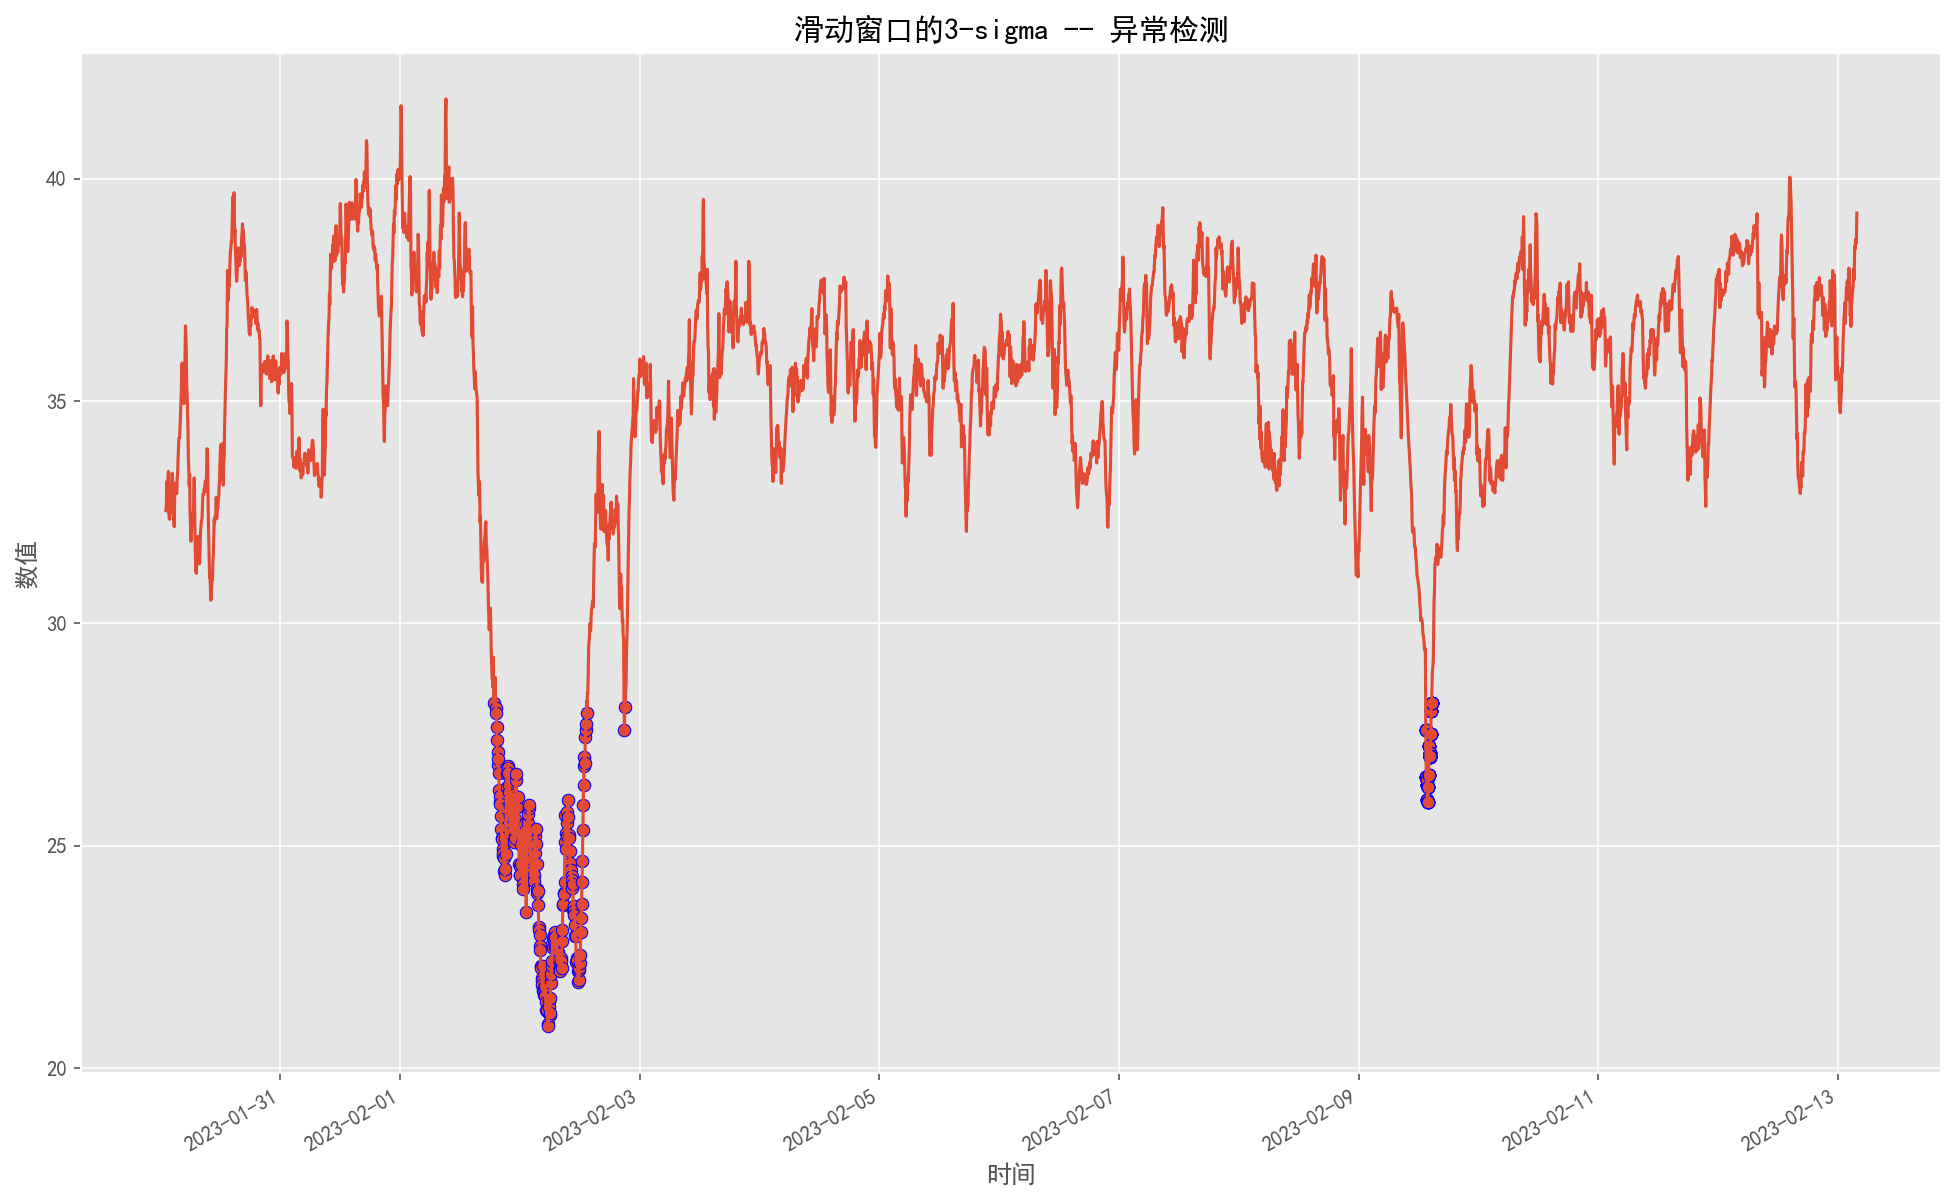

(788    2023-02-01 18:44:37
 793    2023-02-01 19:09:36
 794    2023-02-01 19:14:36
 795    2023-02-01 19:19:37
 796    2023-02-01 19:24:36
                ...        
 8987   2023-02-09 14:35:36
 8988   2023-02-09 14:35:36
 8989   2023-02-09 14:35:36
 8990   2023-02-09 14:35:36
 8991   2023-02-09 14:35:36
 Name: ts, Length: 342, dtype: datetime64[ns],
 788     28.210846
 793     28.103565
 794     27.982862
 795     27.661039
 796     27.366055
           ...    
 8987    28.197445
 8988    28.197445
 8989    28.197445
 8990    28.197445
 8991    28.197445
 Name: temperature, Length: 342, dtype: float64)

In [34]:
## 测试
sliding_3_sigma(len(GroupTemperture),3,GroupTemperture,GroupTS)
# sliding_boxplot(len(GroupTemperture),3,GroupTemperture,GroupTS)

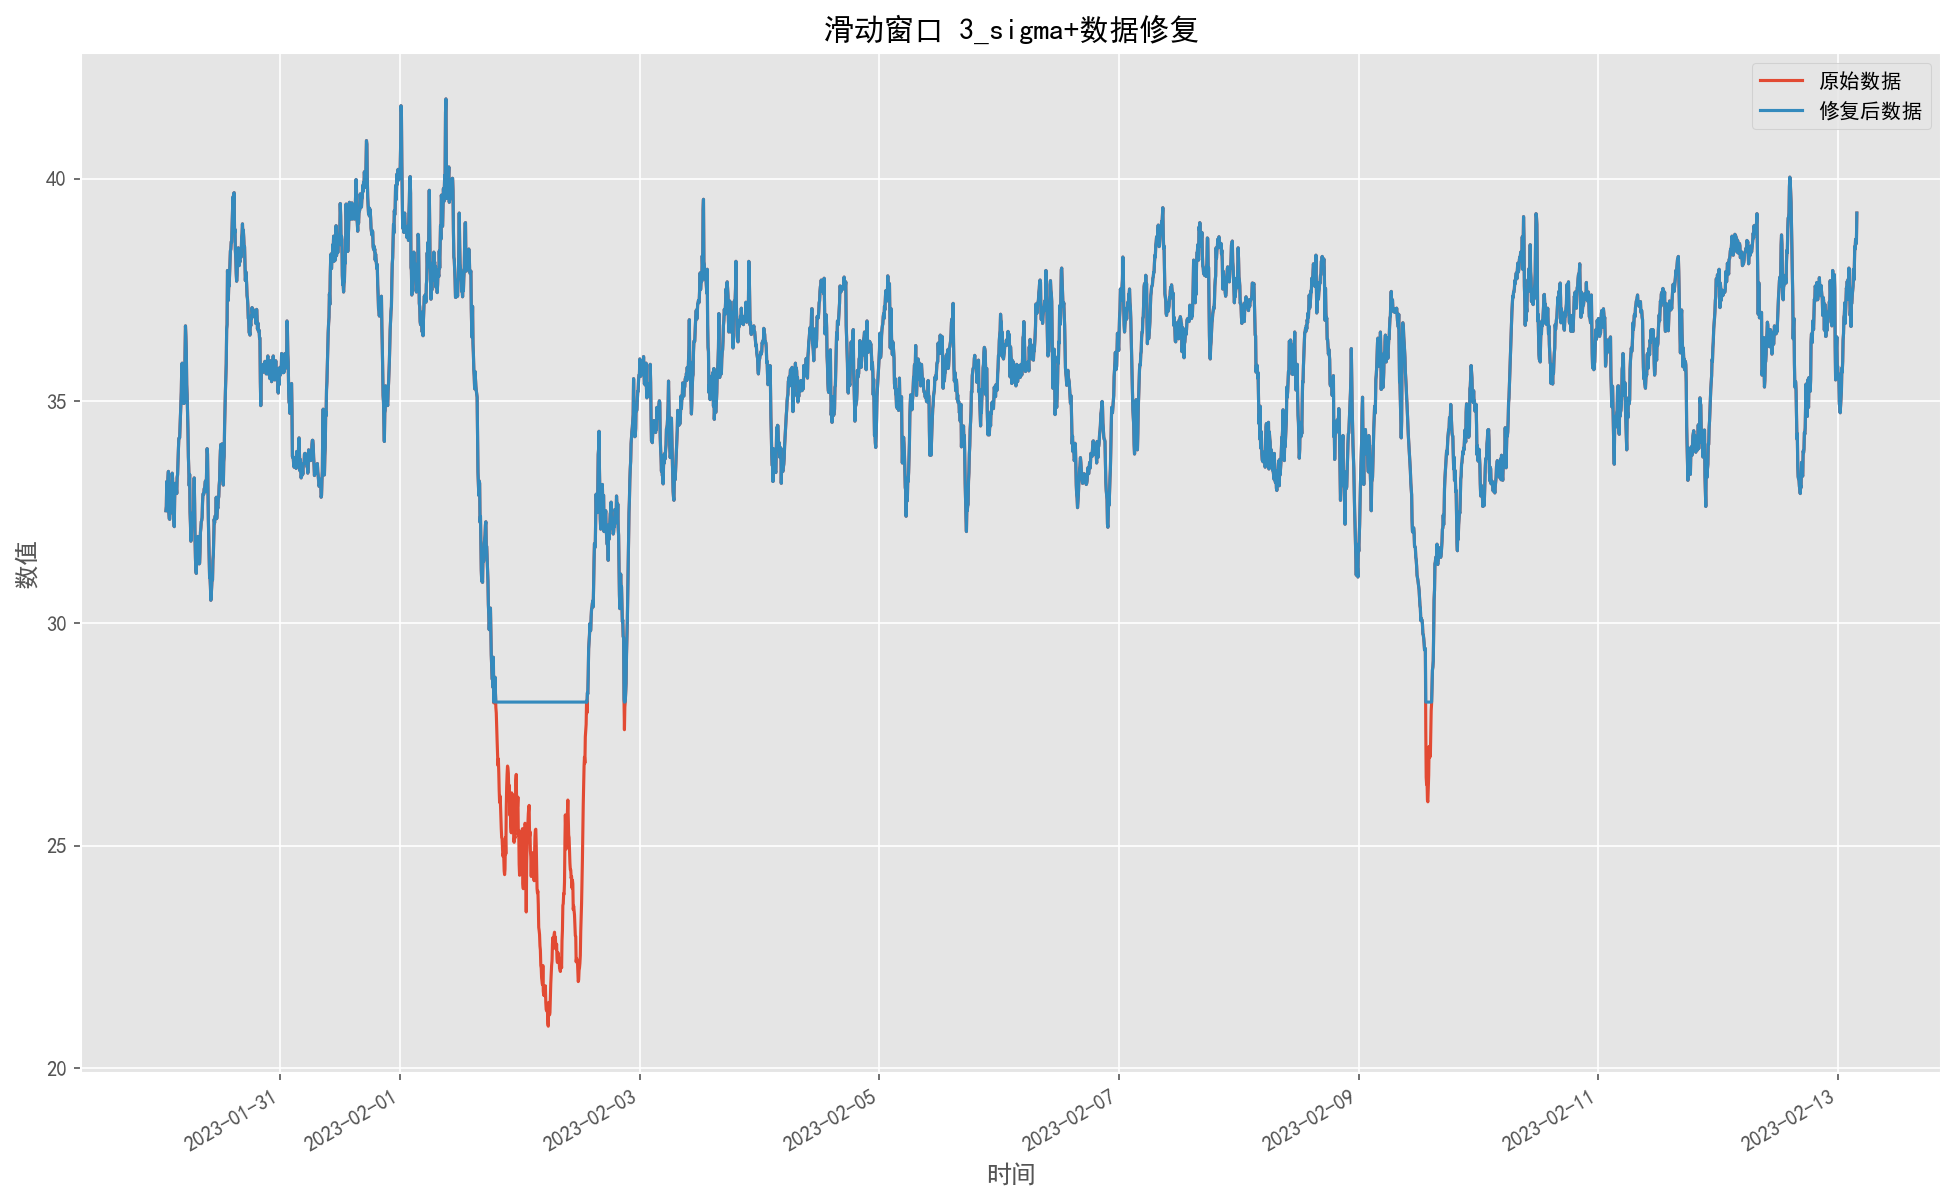

In [35]:
sliding_3_sigma_window_outlier_detection(len(GroupTemperture),3,GroupTemperture,GroupTS)

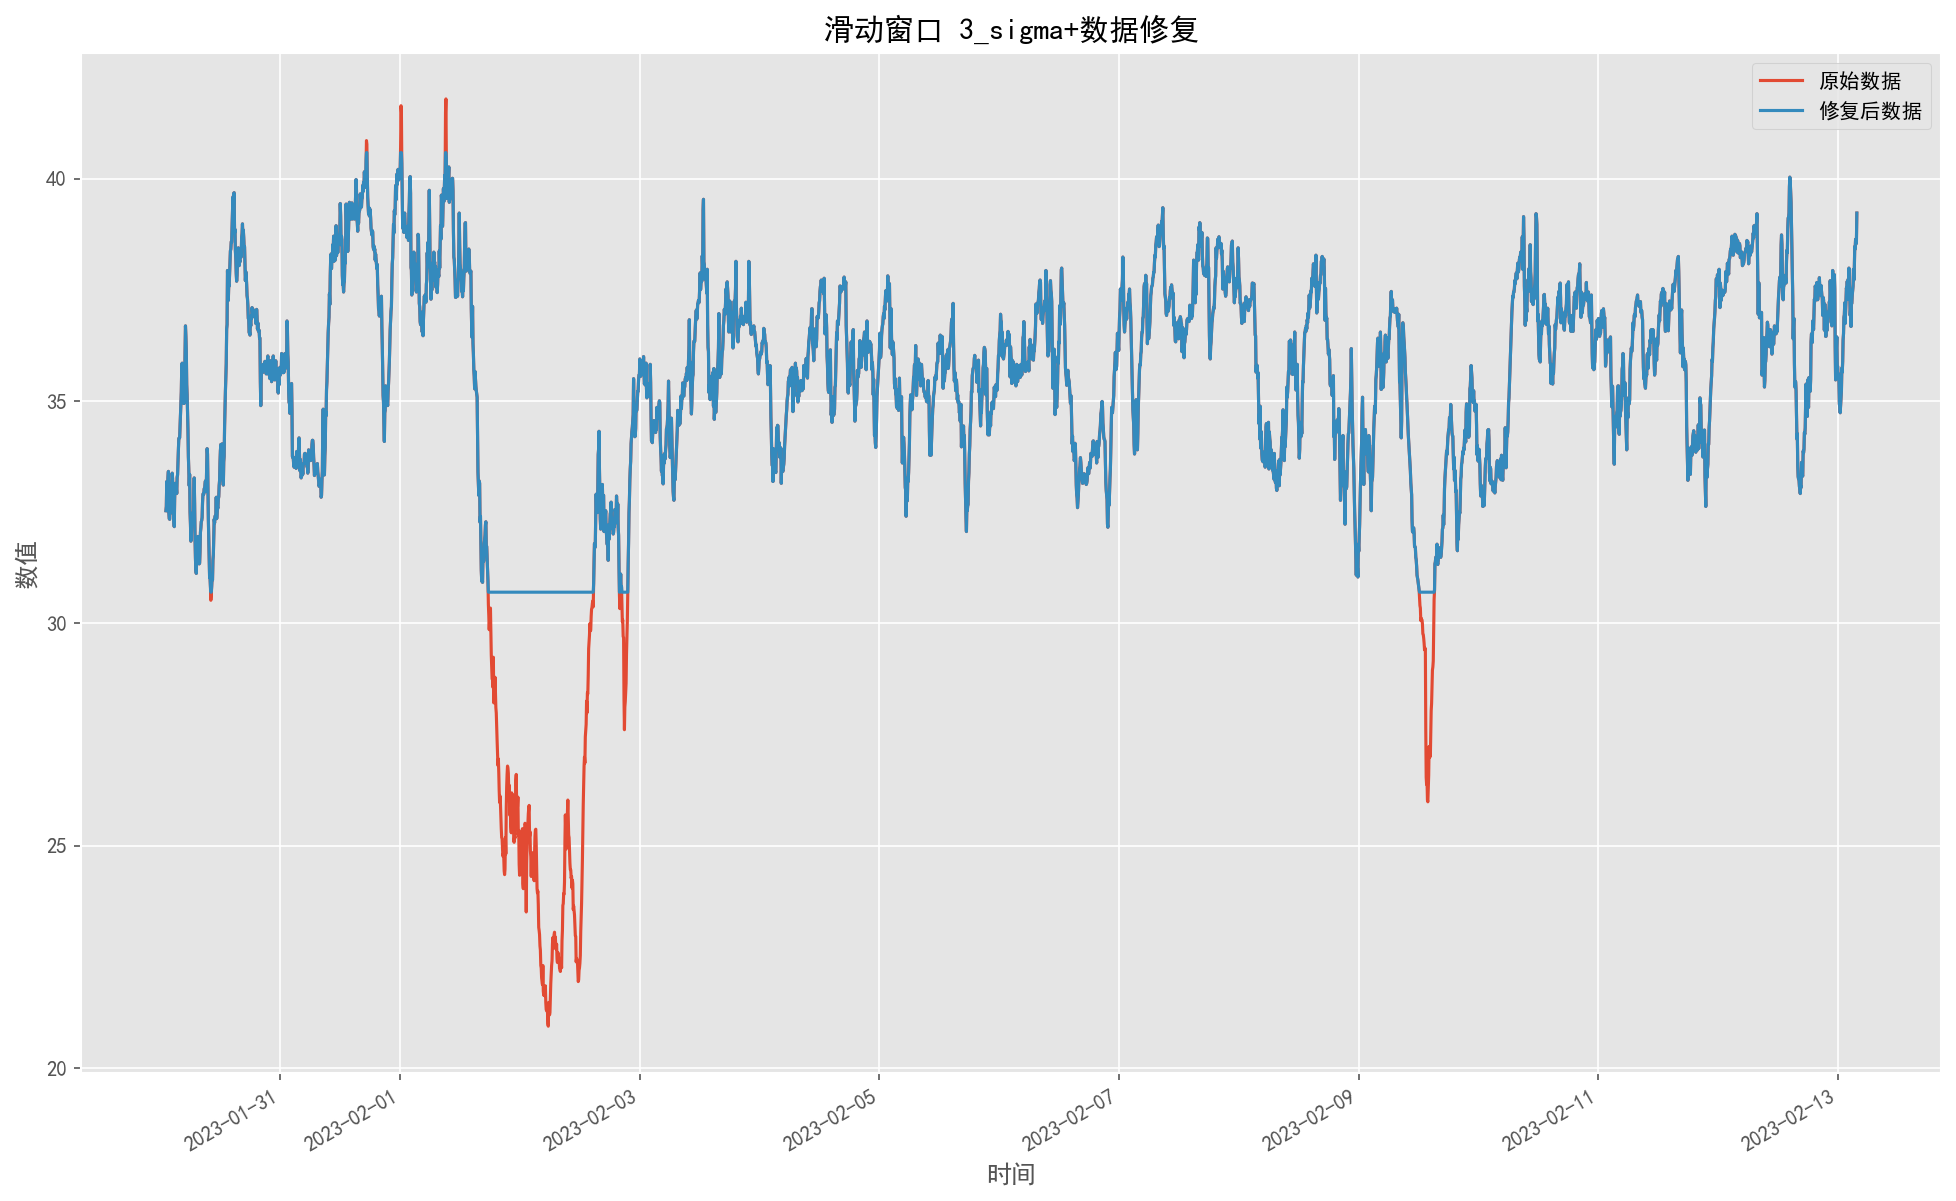

In [36]:
sliding_3_sigma_window_outlier_detection(len(GroupTemperture),2,GroupTemperture,GroupTS)

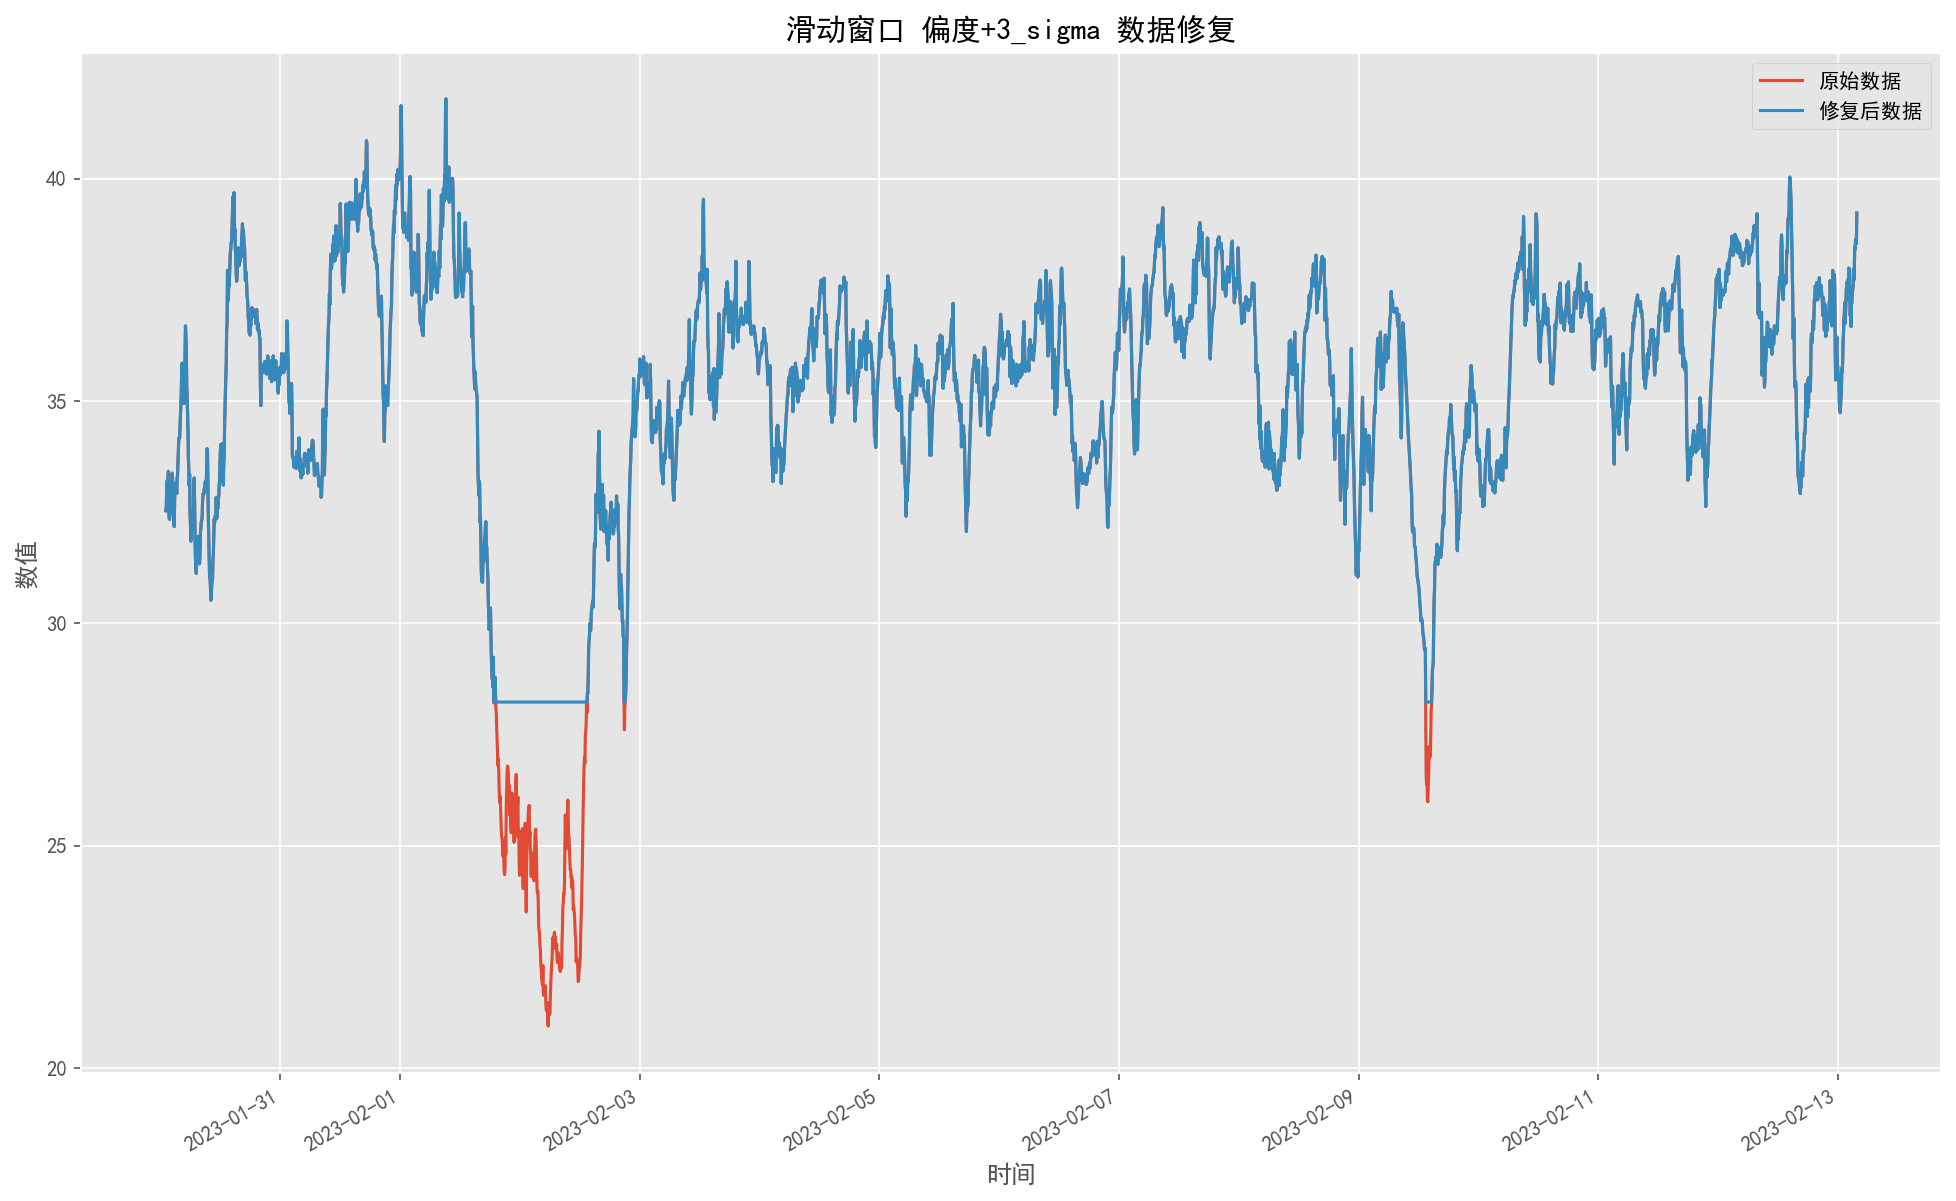

In [37]:
sliding_window_skew_3_sigma_outlier_detection(len(GroupTemperture),3,GroupTemperture,GroupTS)

## 箱线图 的 测试

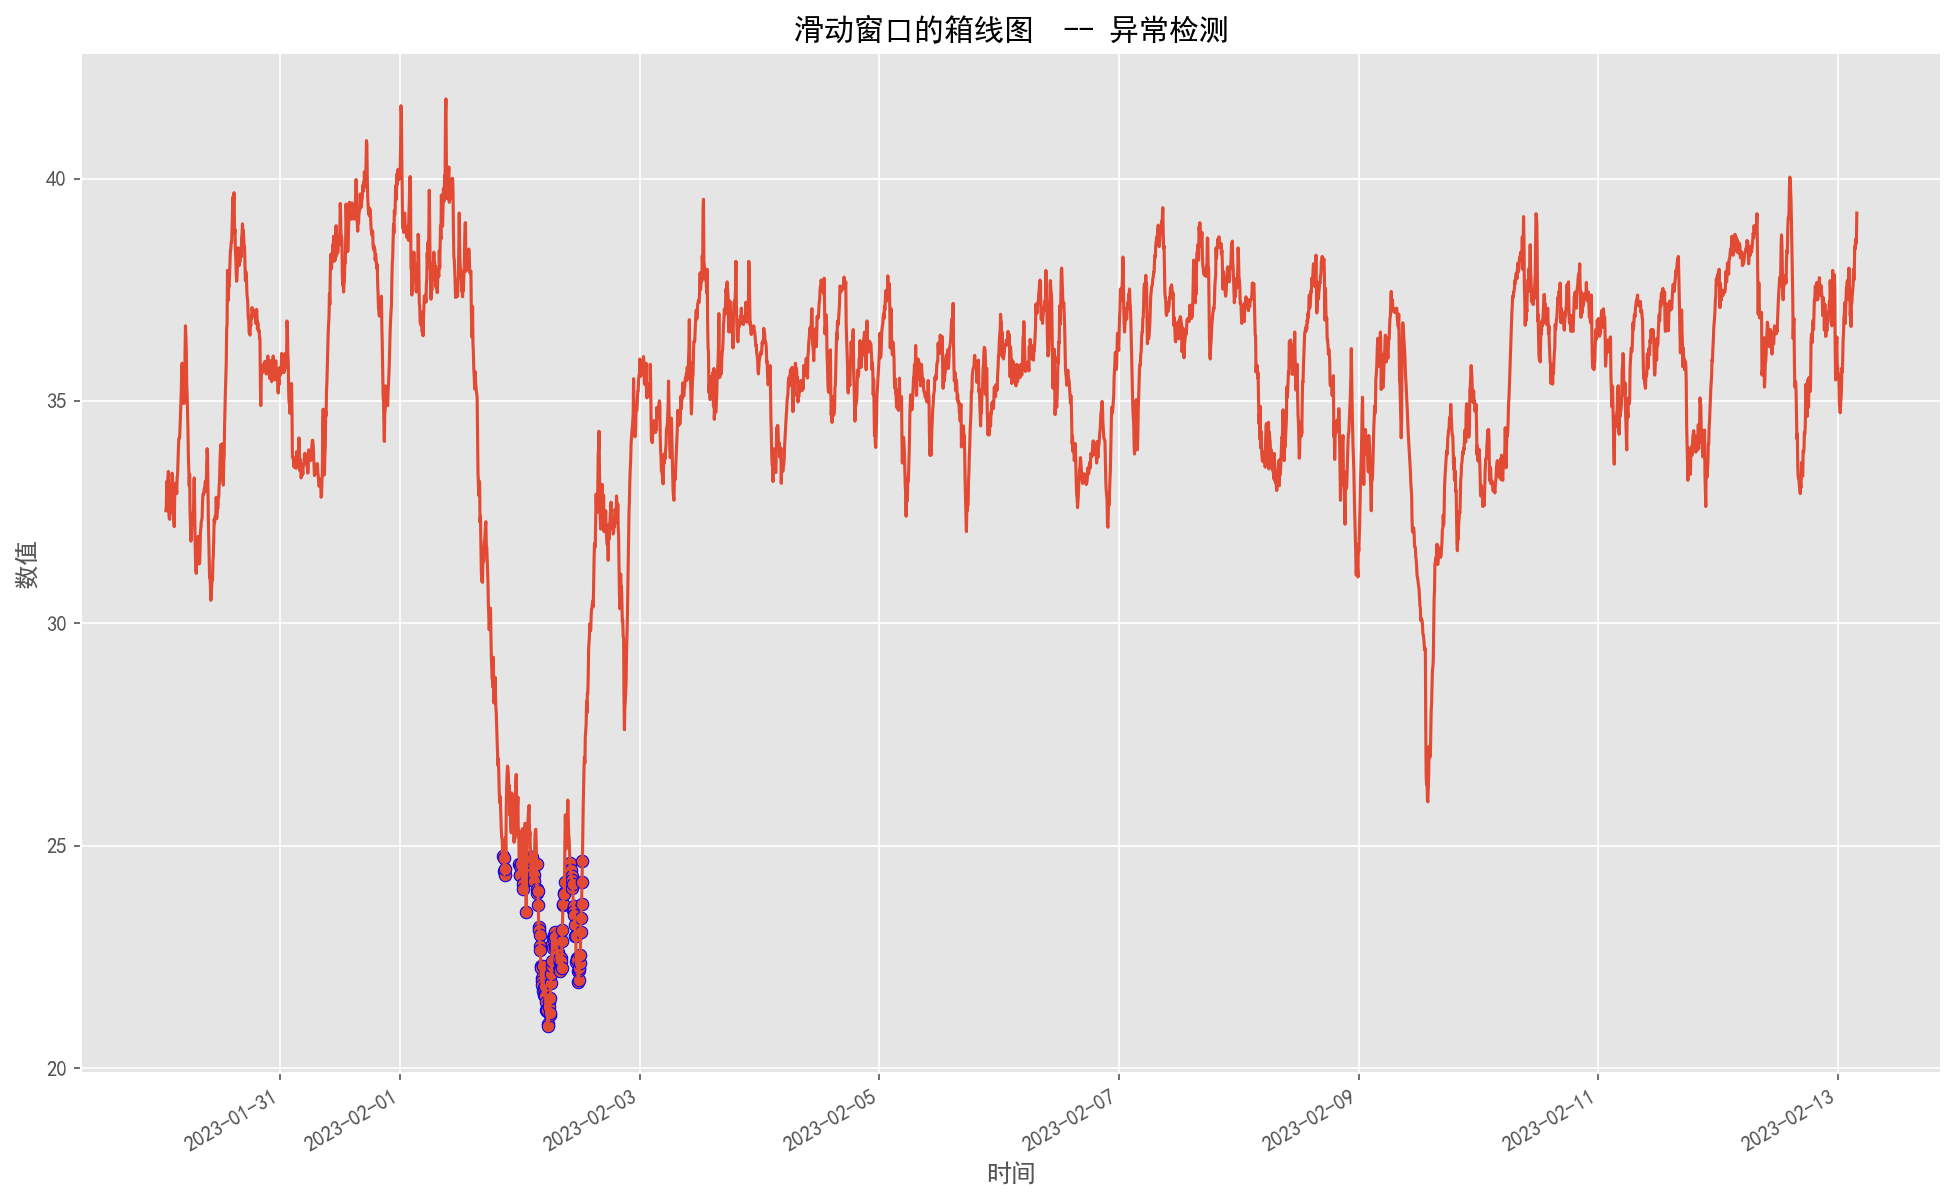

(810    2023-02-01 20:34:37
 812    2023-02-01 20:44:36
 813    2023-02-01 20:49:36
 814    2023-02-01 20:54:37
 815    2023-02-01 20:59:37
                ...        
 997    2023-02-02 12:09:41
 998    2023-02-02 12:14:42
 999    2023-02-02 12:19:42
 1000   2023-02-02 12:24:42
 1001   2023-02-02 12:29:42
 Name: ts, Length: 123, dtype: datetime64[ns],
 810     24.760099
 812     24.732613
 813     24.430212
 814     24.347734
 815     24.471430
           ...    
 997     23.066826
 998     23.374722
 999     23.696056
 1000    24.182802
 1001    24.663889
 Name: temperature, Length: 123, dtype: float64)

In [38]:
sliding_boxplot(len(GroupTemperture),3,GroupTemperture,GroupTS)

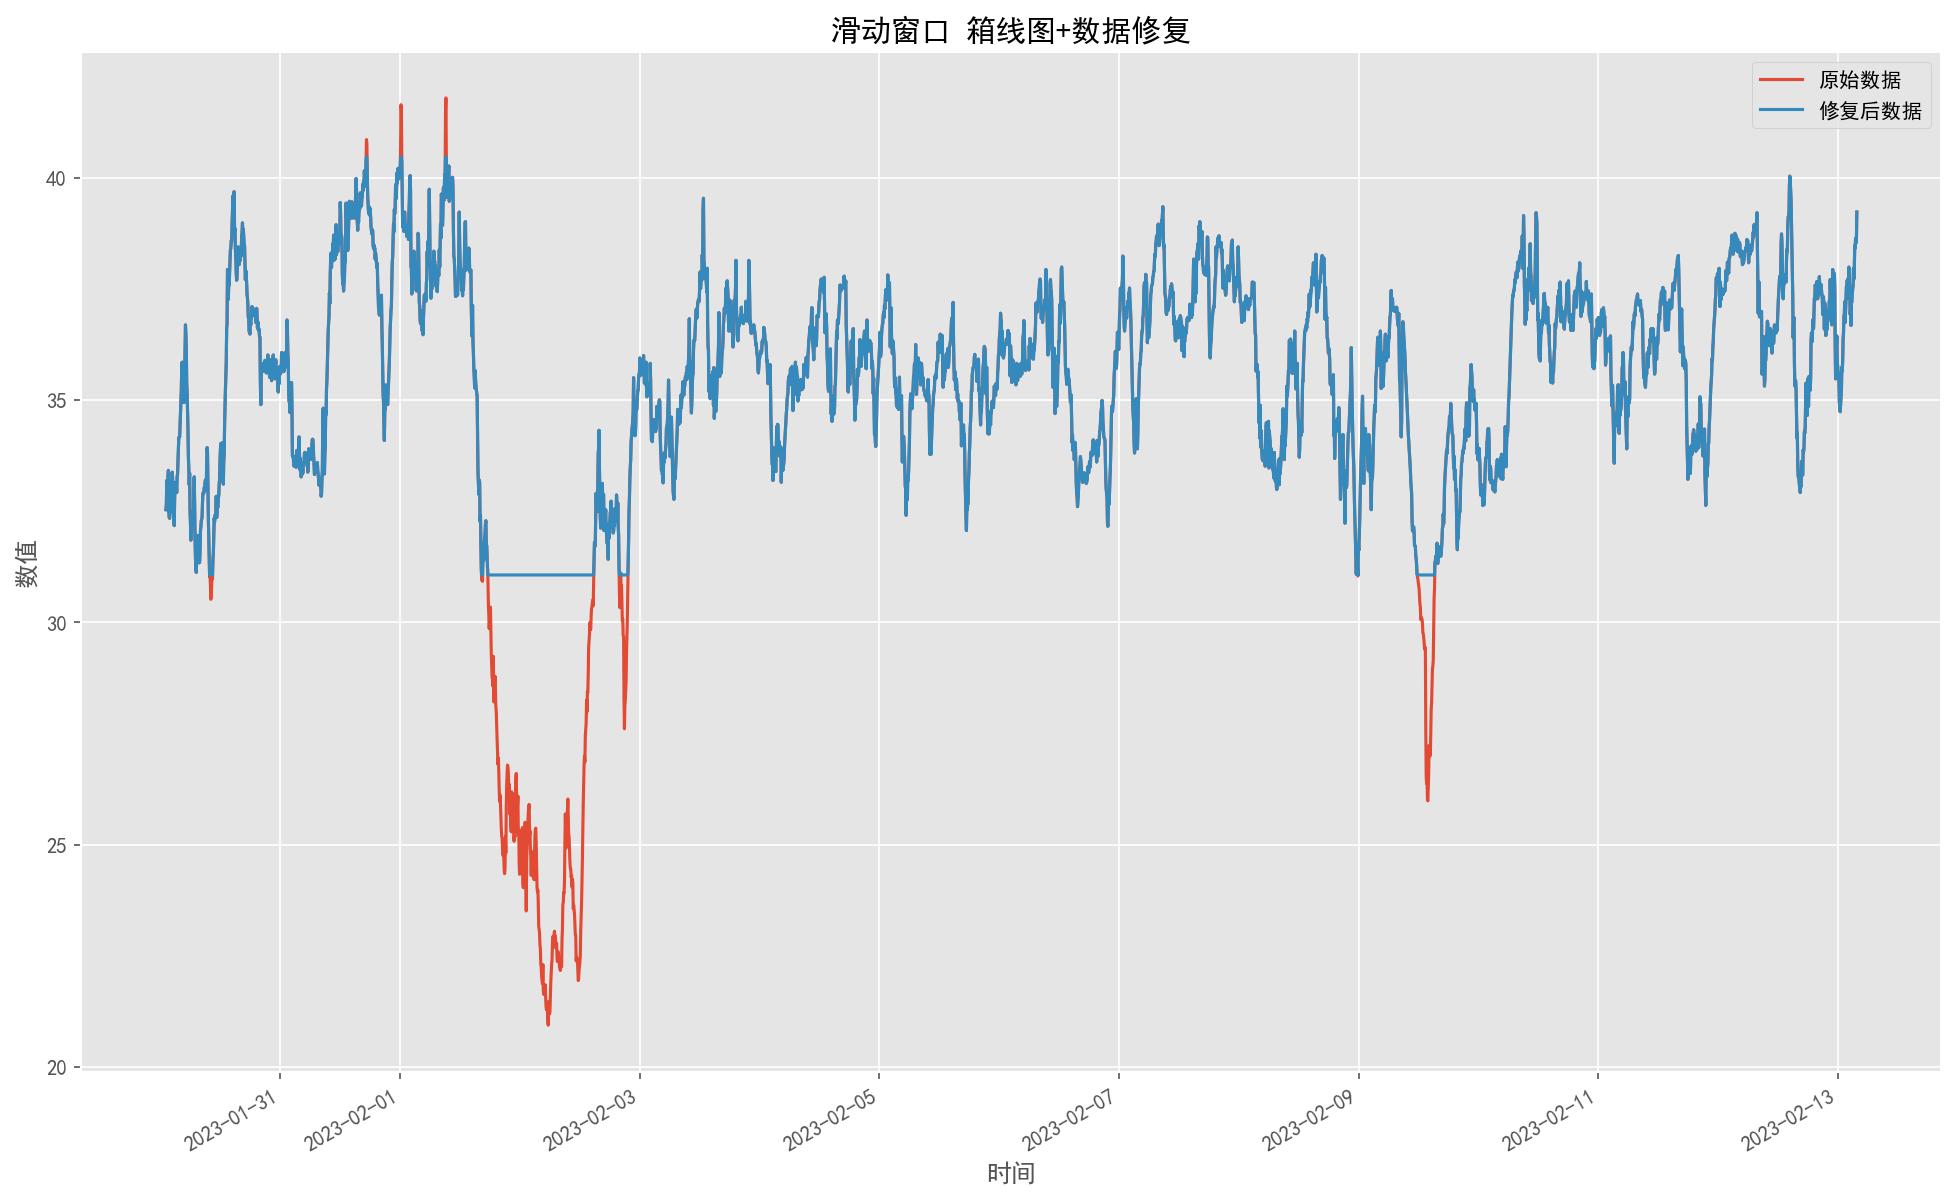

In [39]:
sliding_boxplot_window_outlier_detection(len(GroupTemperture),1,GroupTemperture,GroupTS)

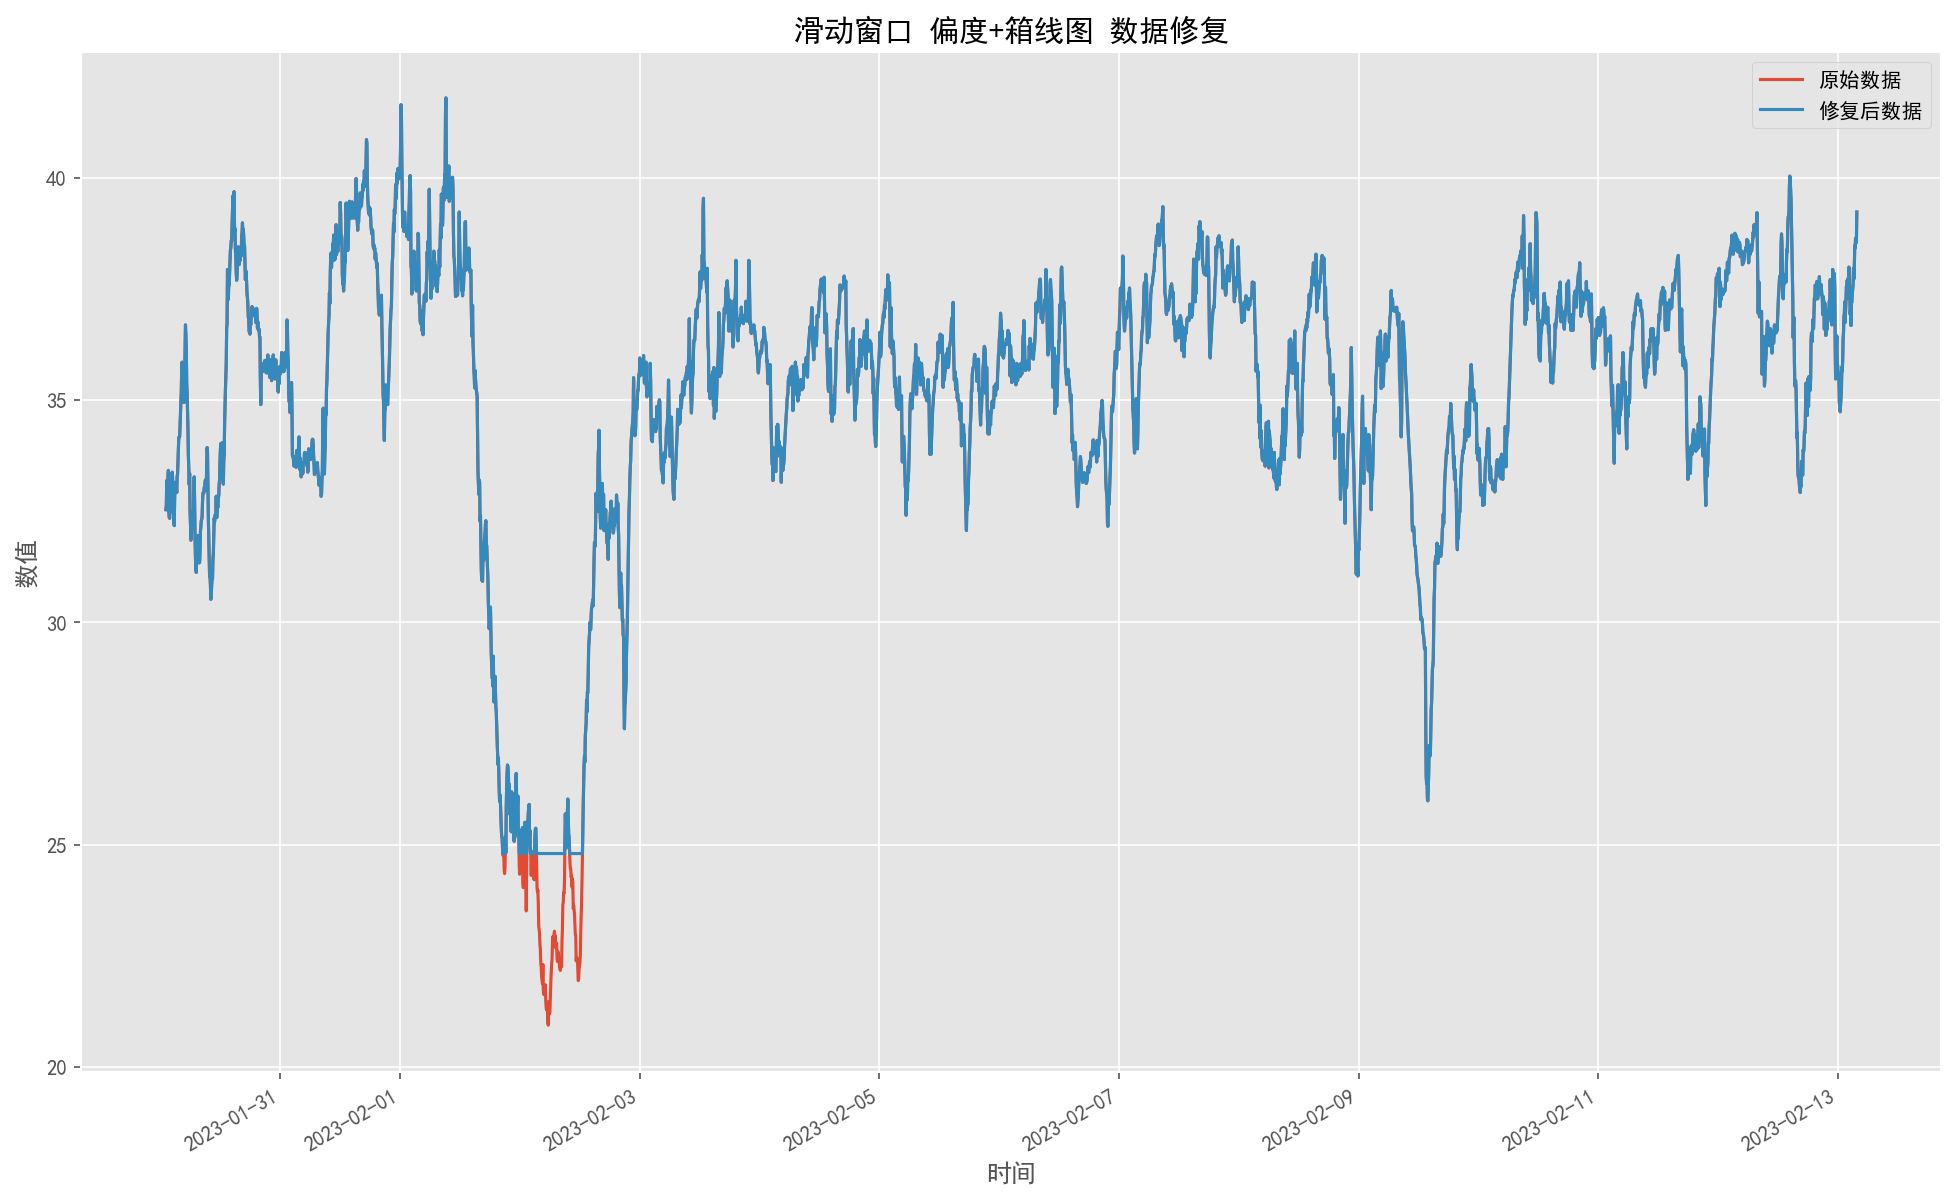

In [40]:
sliding_window_skew_boxplot_outlier_detection(len(GroupTemperture),3,GroupTemperture,GroupTS)

# 以有线-振动数据 only_X 为例

In [41]:
## 提取 X
Vibration = data[data['id'].isin(ONLY_X)][{'point_no','ts','acceleration_peak_x' ,'acceleration_rms_x','speed_peak_x','speed_rms_x'}]
Vibration_point_no_groups = Vibration.groupby(['point_no'])

C:\Users\JDD\AppData\Local\Temp\ipykernel_12872\1326968331.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  Vibration = data[data['id'].isin(ONLY_X)][{'point_no','ts','acceleration_peak_x' ,'acceleration_rms_x','speed_peak_x','speed_rms_x'}]


In [42]:
print("一共包含  ",len(Vibration_point_no_groups),"  Vibration_point_no_groups")
Vibration
# 50294D205090011

一共包含   159   Vibration_point_no_groups


,speed_peak_x,point_no,speed_rms_x,ts,acceleration_rms_x,acceleration_peak_x
896,5.397376,50294D205090011,1.188587,2023-01-30 01:00:49,0.822487,2.143166
897,10.170306,50294D205090012,1.863171,2023-01-30 01:00:49,0.858965,2.949833
898,7.558921,50294D205090014,1.656308,2023-01-30 01:00:49,0.766192,2.238524
899,4.908618,50294D205090021,1.324626,2023-01-30 01:00:49,0.552536,1.815161
900,4.282068,50294D205090022,1.171757,2023-01-30 01:00:49,0.325695,1.072225
...,...,...,...,...,...,...
9999995,5.548491,50294D205171032,2.218695,2023-02-13 03:51:04,0.606266,8.174423
9999996,2.732698,50294D205171033,0.857606,2023-02-13 03:51:04,0.593633,7.044190
9999997,3.589953,50294D205171034,1.093219,2023-02-13 03:51:04,0.615582,8.844166
9999998,6.898361,50294D205171011,2.700441,2023-02-13 03:51:04,0.700421,9.195675


In [228]:
VibrationGroupSample = Vibration_point_no_groups.get_group("50294D205090022")
VibrationGroupSample = VibrationGroupSample.sort_values(by='ts')
VibrationPointNo = VibrationGroupSample.point_no.values[0]
VibrationPointNo

'50294D205090022'

In [229]:
# 数据传参，异常分析
# 重新设置索引，转为numpy格式
VibrationTS = VibrationGroupSample.ts.reset_index(drop = True)
VibrationAcceleration_peak_x = VibrationGroupSample.acceleration_peak_x.reset_index(drop = True)
VibrationAcceleration_rms_x = VibrationGroupSample.acceleration_rms_x.reset_index(drop = True)
VibrationSpeed_peak_x = VibrationGroupSample.speed_peak_x.reset_index(drop = True)
VibrationSpeed_rms_x = VibrationGroupSample.speed_rms_x.reset_index(drop = True)


## 1、高维滑动窗口的3-sigma 【异常检测】

In [230]:
def sliding_3_sigma_high(win, t, val, ts, name):
    """
    滑动窗口的3-sigma
    :param win: windows，窗口大小
    :param t: 3-sigma ,t = 3
    :param val: 数值序列数组 pandas.core.series.Series 'acceleration_peak_x' ,'acceleration_rms_x','speed_peak_x','speed_rms_x'
    :param ts: 时间序列 pandas.core.series.Series
    :return: x,y 异常点位置与数值
    """
    # 定义窗口大小和阈值
    window_size = win
    threshold = t

    plt.rcParams['font.sans-serif'] = 'Simhei' # 显示中文
    plt.figure(figsize=(16,10),dpi=150)

    # 异常相关度记录，大于2就整体异常
    # 空间复杂度换时间复杂度
    Relevance = np.zeros(len(val[0]))

    MAX_Y = 0
    # 检测异常值和突变
    for a in val:
        print(a.name)
        anomaly = []
        for i in range(0,len(a) - window_size + 1):
            window = a[i:i+window_size]
            mean_w = np.mean(window)
            std_w = np.std(window)
            for j in range(window_size):
                if abs(window[j+i] - mean_w) > threshold * std_w:
                    anomaly.append(i+j)
                    # break

        # 记录相关度
        Relevance[anomaly] = Relevance[anomaly] + 1

        # 显示异常点
        x = ts[anomaly]
        y = a[anomaly]

        # 获得y轴最大值 MAX_Y
        MAX_Y = max(max(y),MAX_Y)

        # 可视化结果
        plt.plot(ts,a,label = a.name )
        plt.scatter(x, y , c ='r')


    # 统计相关度大于R的点
    R_anomaly = []
    R = 3
    for i in range(0,len(Relevance)):
        if Relevance[i] > R:
            R_anomaly.append(i)

    # 显示异常点
    X = ts[R_anomaly]
    # R_anomaly2 =[ R_anomaly[i] + 1 for i in range(0,len(R_anomaly))]
    # X1 = ts[R_anomaly2]

    # 可视化结果
    print("相关性>",R,"的异常点：\n",X)
    plt.fill_between ( x = X, y1=0,y2=MAX_Y+1,facecolor='green', alpha=0.3 ,label = "相关度较大")

    plt.gcf().autofmt_xdate() # 自适应X坐标
    plt.title("滑动窗口的3-sigma -- 高维异常检测 -- "+name)
    plt.xlabel('时间')
    plt.ylabel('数值')
    plt.legend()  # 显示图例
    plt.show()


## 测试

acceleration_peak_x
acceleration_rms_x
speed_peak_x
speed_rms_x
相关性> 3 的异常点：
 161   2023-01-30 14:25:54
189   2023-01-30 16:45:54
Name: ts, dtype: datetime64[ns]


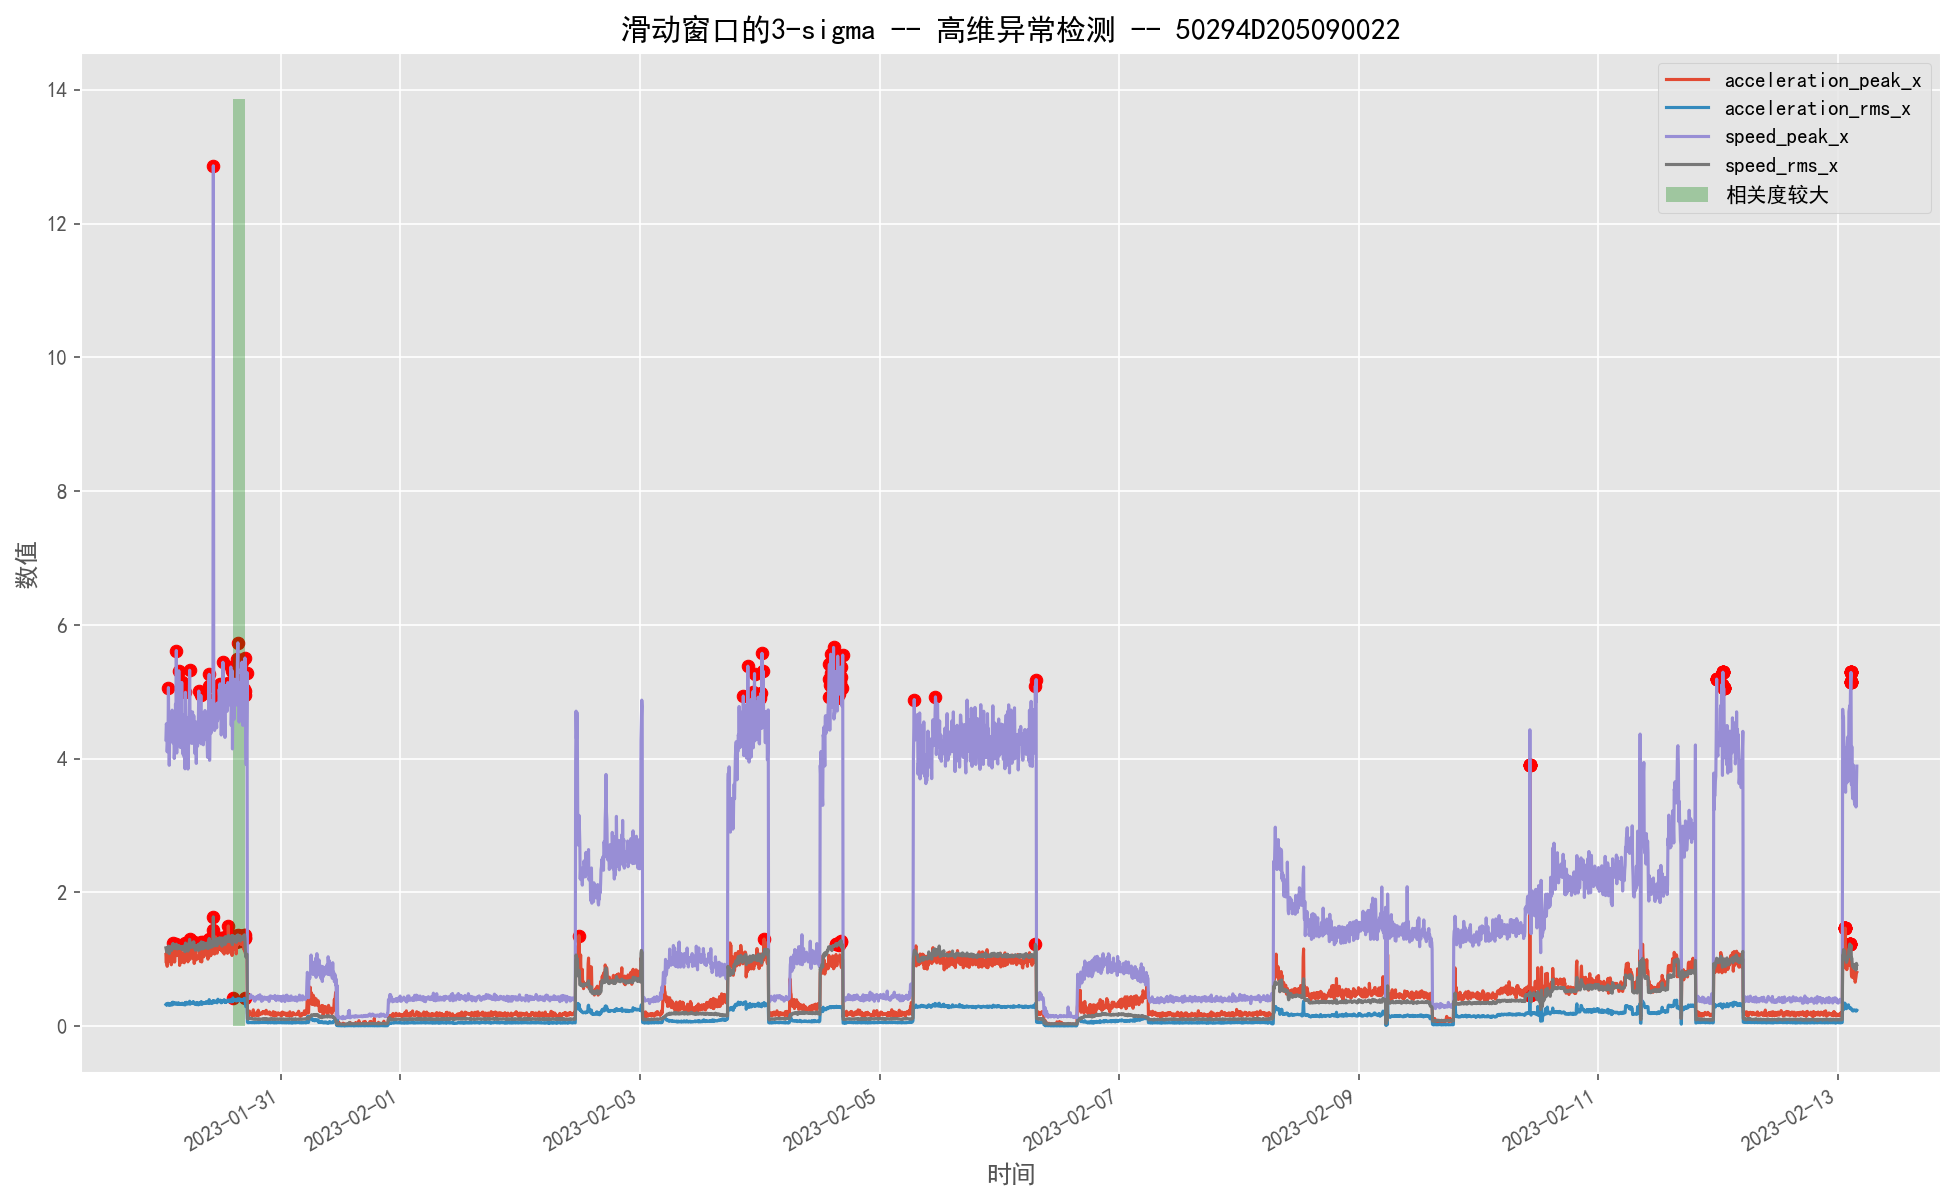

In [231]:
Win = len(VibrationAcceleration_peak_x)
Val = [VibrationAcceleration_peak_x,VibrationAcceleration_rms_x,VibrationSpeed_peak_x,VibrationSpeed_rms_x]
sliding_3_sigma_high(Win,3,Val,VibrationTS,VibrationPointNo)

In [ ]:
sliding_3_sigma_high(len(VibrationSpeed_rms_x),3,VibrationSpeed_rms_x,VibrationTS)

# 分析无线- X、Y、Z 之间的相关性

In [233]:
## 提取XYZ
Vibration_Wireless= data[data['id'].isin(YZl)][{'point_no','ts','acceleration_peak_x' ,'acceleration_peak_y','acceleration_peak_z'}]
Vibration_Wireless_point_no_groups = Vibration_Wireless.groupby(['point_no'])

C:\Users\JDD\AppData\Local\Temp\ipykernel_12872\3429318365.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  Vibration_Wireless= data[data['id'].isin(YZl)][{'point_no','ts','acceleration_peak_x' ,'acceleration_peak_y','acceleration_peak_z'}]


In [234]:
print("一共包含  ",len(Vibration_Wireless_point_no_groups),"  Vibration_Wireless_point_no_groups")
Vibration_Wireless

一共包含   335   Vibration_Wireless_point_no_groups


,point_no,acceleration_peak_y,ts,acceleration_peak_z,acceleration_peak_x
805,c9bbcffeff8d79e0-Z,95.400002,2023-01-30 01:00:00,48.049999,273.000000
807,fe1fe4feff8d79e0-Z,9.780000,2023-01-30 01:00:02,3.140000,9.820000
809,5bf8d6feff8d79e0-Z,59.039997,2023-01-30 01:00:03,90.180000,30.199999
811,a41ae4feff8d79e0-Z,2.890000,2023-01-30 01:00:03,2.790000,1.633900
813,fe1de4feff8d79e0-Z,12.410000,2023-01-30 01:00:04,14.679999,7.520000
...,...,...,...,...,...
9999927,0cdeeafeff8d79e0-Z,2.040000,2023-02-13 03:51:03,2.540000,2.320000
9999929,c91ce4feff8d79e0-Z,35.329998,2023-02-13 03:51:03,34.349998,43.610001
9999931,ef1fe4feff8d79e0-Z,9.050000,2023-02-13 03:51:03,6.180000,9.830000
9999933,fc1de4feff8d79e0-Z,28.609999,2023-02-13 03:51:04,50.509998,14.120000


In [235]:
VibrationWirelessGroupSample = Vibration_Wireless_point_no_groups.get_group("c9bbcffeff8d79e0-Z")
VibrationWirelessGroupSample = VibrationWirelessGroupSample.sort_values(by='ts')
VibrationWirelessPointNo = VibrationWirelessGroupSample.point_no.values[0]
VibrationWirelessPointNo

'c9bbcffeff8d79e0-Z'

In [237]:
# 数据传参，异常分析
# 重新设置索引，转为numpy格式
VibrationWirelessTS = VibrationWirelessGroupSample.ts.reset_index(drop = True)
VibrationWirelessAcceleration_peak_x = VibrationWirelessGroupSample.acceleration_peak_x.reset_index(drop = True)
VibrationWirelessAcceleration_peak_y = VibrationWirelessGroupSample.acceleration_peak_y.reset_index(drop = True)
VibrationWirelessAcceleration_peak_z = VibrationWirelessGroupSample.acceleration_peak_z.reset_index(drop = True)

##  测试

In [240]:
Win = len(VibrationWirelessAcceleration_peak_x)
Val = [VibrationWirelessAcceleration_peak_x,VibrationWirelessAcceleration_peak_y,VibrationWirelessAcceleration_peak_z]
sliding_3_sigma_high(Win,3,Val,VibrationWirelessTS,VibrationWirelessPointNo)

acceleration_peak_x


ValueError: max() arg is an empty sequence

<Figure size 2400x1500 with 0 Axes>